# Insurance Claims- Fraud Detection
## Problem Statement:
### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [3]:
df=pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 6\Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Shape of the dataset

In [4]:
df.shape

(1000, 40)

The dataset contains 1000 rows and 40 columns

# Check the concise summary of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Checking for null values

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Check uniqueness in features

In [7]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Check Duplicates

In [8]:
df.duplicated().sum()

0

# Visualization

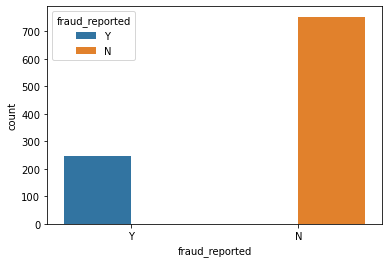

In [9]:
sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')
plt.show()

From abobe plot, like most fraud datasets, the label distribution is skewed.

In [10]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

So the target class is very imbalanced. This makes the classification more difficult. We should try to avoid as many false positives as we can. Let’s try to look for an indicative variable. Let’s analyze location. This dataset only has information from the mid-Atlantic states, so that’s what we’ll work with.

In [11]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

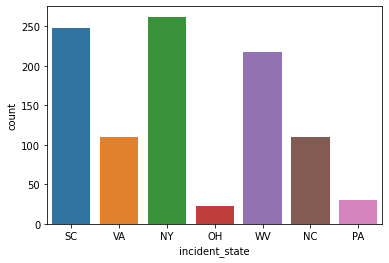

In [12]:
fig = plt.figure(figsize=(6,4))
sns.countplot(x=df.incident_state, data=df)
plt.show()

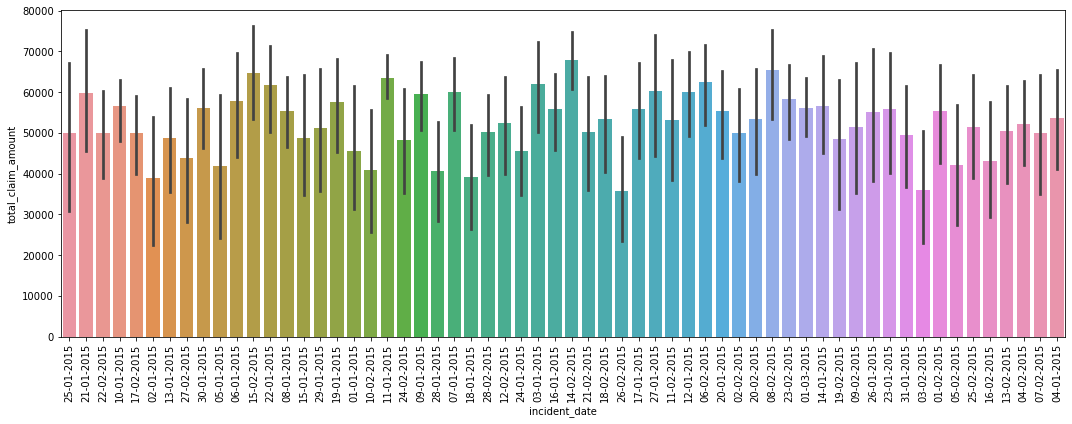

In [13]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x = 'incident_date', y = 'total_claim_amount', data = df)
plt.xticks(rotation=90) 
plt.show()

We see that, all the cases in above plot are for the months of January and February

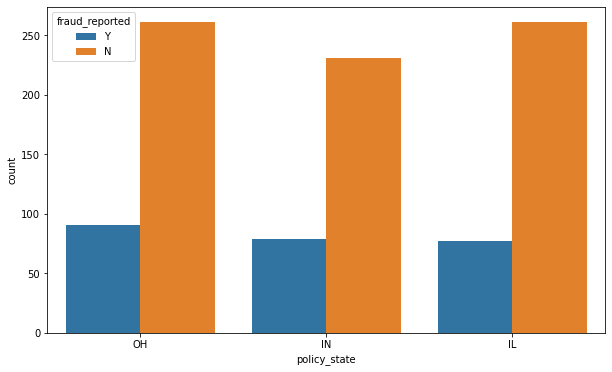

In [14]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=df.policy_state, data=df, hue='fraud_reported')
plt.show()

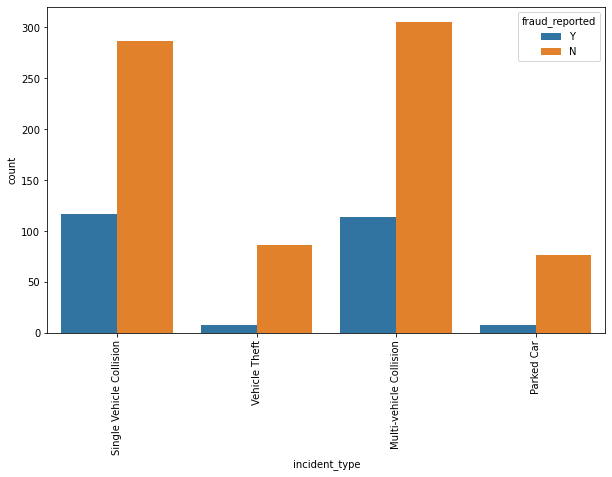

In [15]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=df.incident_type, data=df, hue='fraud_reported')
plt.xticks(rotation=90)
plt.show()

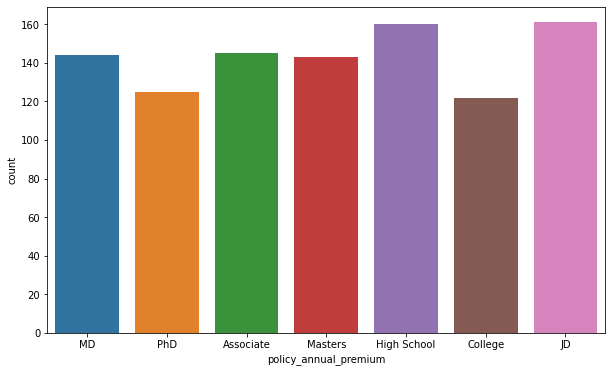

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'insured_education_level', data=df) 
plt.xlabel('policy_annual_premium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

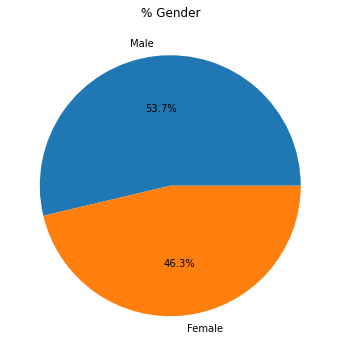

In [17]:
fig = plt.figure(figsize=(10,6))
plt.pie(df['insured_sex'].value_counts(),autopct='%.1f%%', labels = ['Male', 'Female'])                                                                           
plt.title('% Gender')
plt.show()

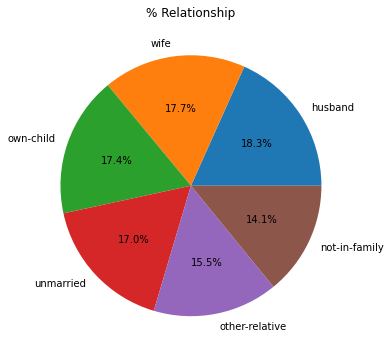

In [18]:
plt.figure(figsize=(10,6))
plt.pie(df['insured_relationship'].value_counts(),autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried',
            'other-relative', 'not-in-family'])                                                                           
plt.title('% Relationship')
plt.show()

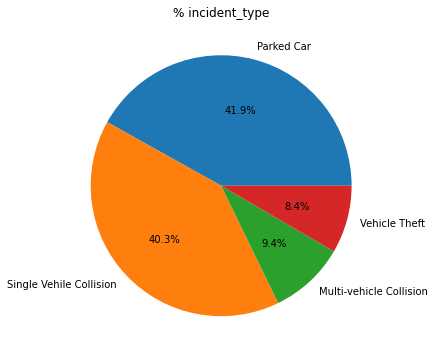

In [19]:
plt.figure(figsize=(10,6))
plt.pie(df['incident_type'].value_counts(),autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 
    'Multi-vehicle Collision', 'Vehicle Theft'])                                                                           
plt.title('% incident_type')
plt.show()

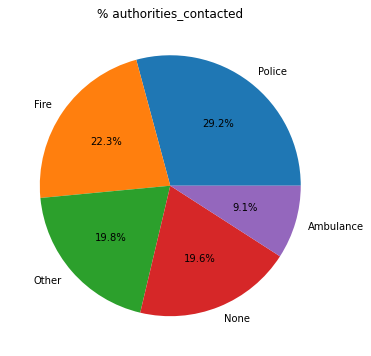

In [20]:
plt.figure(figsize=(10,6))
plt.pie(df['authorities_contacted'].value_counts(),autopct='%.1f%%', labels = ['Police', 'Fire',
        'Other', 'None', 'Ambulance'])                                                                           
plt.title('% authorities_contacted')
plt.show()

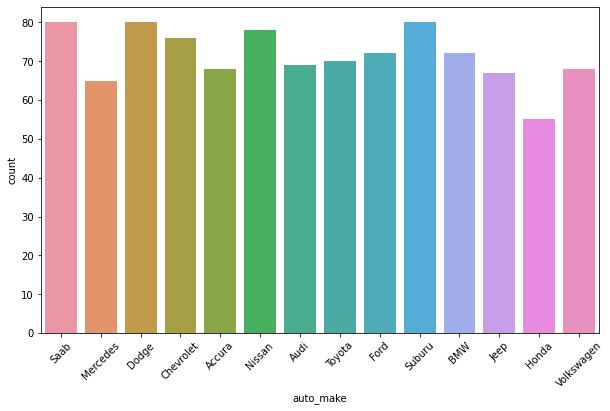

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='auto_make', data=df)
plt.xticks(rotation=45) 
plt.show()

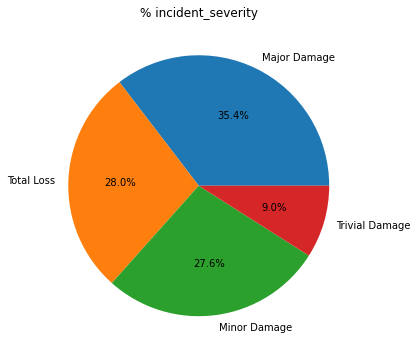

In [22]:
plt.figure(figsize=(10,6))
plt.pie(df['incident_severity'].value_counts(),autopct='%.1f%%', labels = ['Major Damage', 'Total Loss',
        'Minor Damage', 'Trivial Damage'])                                                                           
plt.title('% incident_severity')
plt.show()

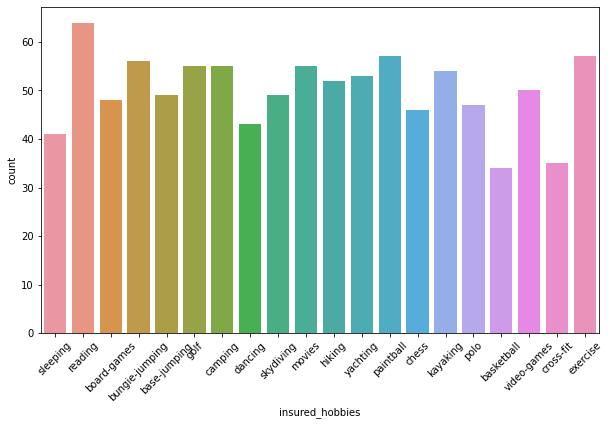

In [23]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='insured_hobbies', data=df)
plt.xticks(rotation=45) 
plt.show()

In [24]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

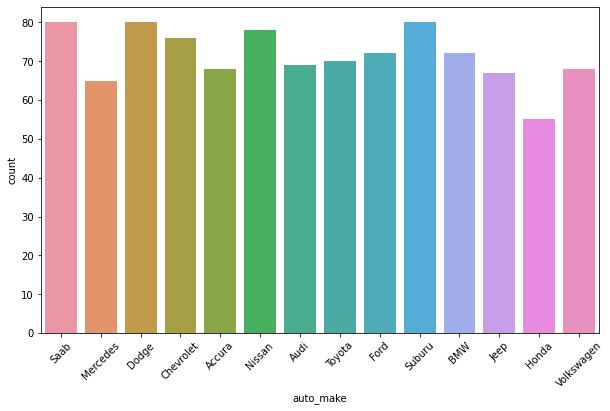

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.auto_make, data=df)
plt.xticks(rotation=45)
plt.show()

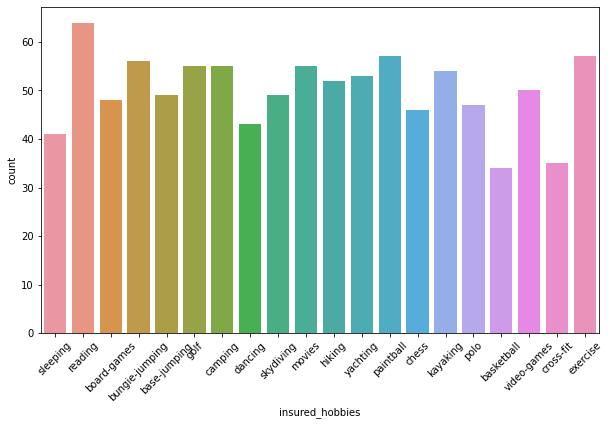

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.insured_hobbies, data=df)
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [27]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [29]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

auto_year has 21 levels, and the number of records for each of the levels are quite significant considering datasize is not so large. We will do some feature engineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned.

In [30]:
df['vehicle_age'] = 2022 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    18
1    15
2    15
3     8
4    13
5    19
6    10
7     7
8    10
9    26
Name: vehicle_age, dtype: int64

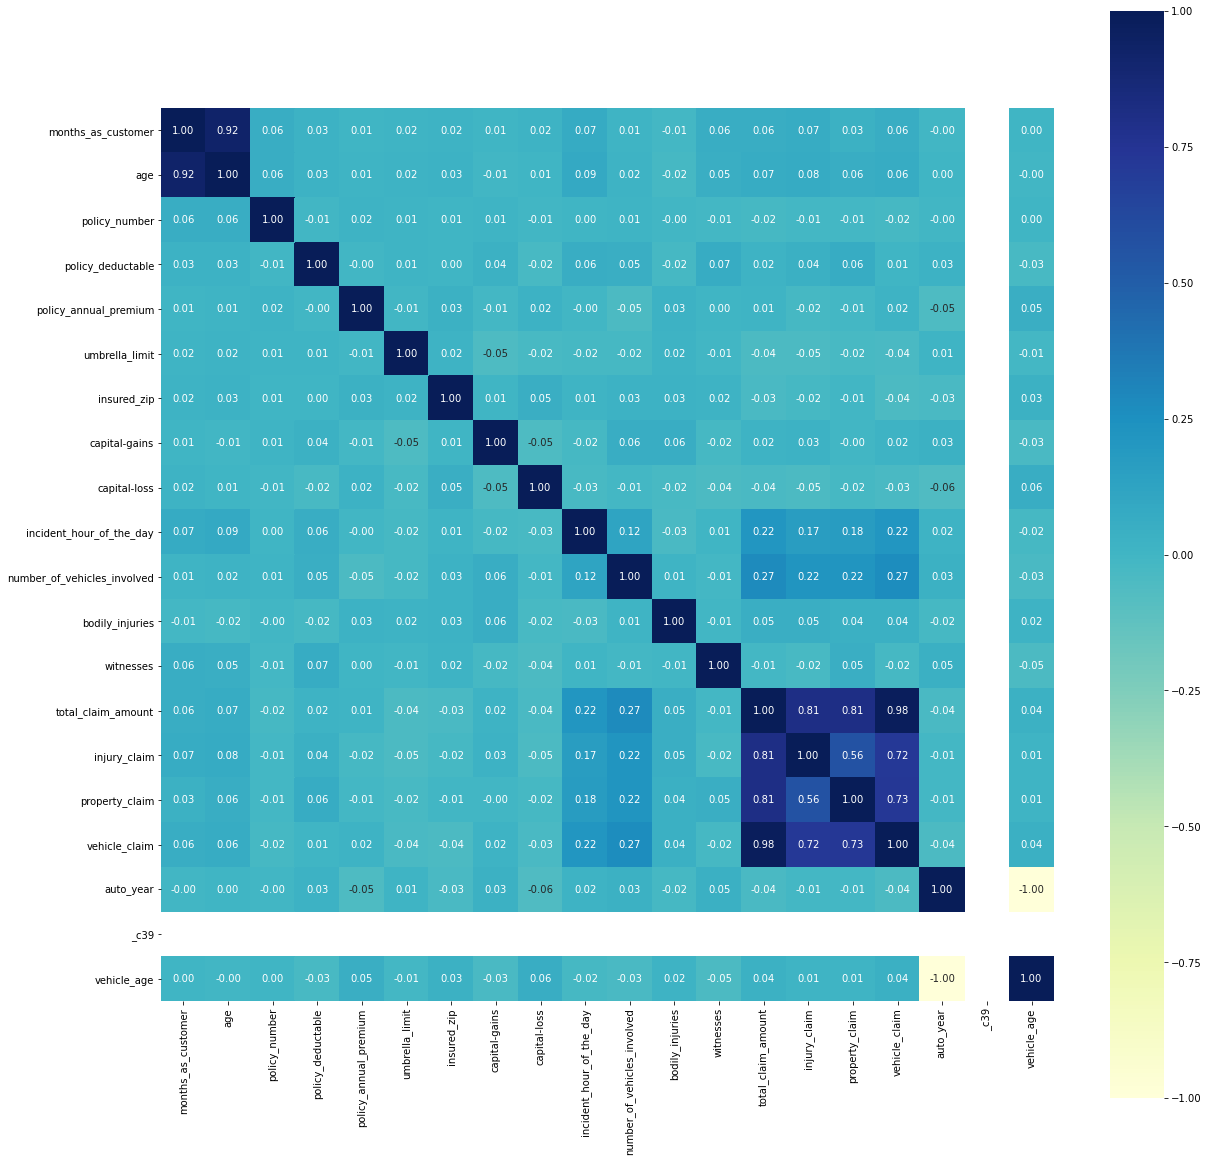

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, square=True,  fmt='.2f', linecolor='green', cmap="YlGnBu")
plt.show()

In [32]:
df["policy_bind_day"]=pd.to_datetime(df.policy_bind_date, format="%d-%m-%Y").dt.day
df["policy_bind_month"]=pd.to_datetime(df.policy_bind_date, format="%d-%m-%Y").dt.month
df["policy_bind_year"]=pd.to_datetime(df.policy_bind_date, format="%d-%m-%Y").dt.year

df["incident_day"]=pd.to_datetime(df.incident_date, format="%d-%m-%Y").dt.day
df["incident_month"]=pd.to_datetime(df.incident_date, format="%d-%m-%Y").dt.month
df["incident_year"]=pd.to_datetime(df.incident_date, format="%d-%m-%Y").dt.year

df['collision_type'] = df['collision_type'].replace('?', 'Rear Collision')
df['property_damage'] = df['property_damage'].replace('?', 'Rear Collision')
df['police_report_available'] = df['police_report_available'].replace('?', 'Not_Known')
df['property_damage'] = df['property_damage'].replace('?', 'Not_Known')

df.replace({'250/500':2, '100/300':1, '500/1000':0}, inplace = True)
df.replace({'MD':0, 'PhD':1, 'Associate':2, 'Masters':3, 'High School':4, 'College':5, 'JD':6}, inplace = True)
df.replace({'craft-repair':0, 'machine-op-inspct':1, 'sales':2, 'armed-forces':3, 'tech-support':4,
            'prof-specialty':5, 'other-service':6, 'priv-house-serv':7, 'exec-managerial':8, 'protective-serv':9,
            'transport-moving':10, 'handlers-cleaners':11, 'adm-clerical':12, 'farming-fishing':13}, inplace = True)
df.replace({'sleeping':0, 'reading':1, 'board-games':2, 'bungie-jumping':3,
            'base-jumping':4, 'golf':5, 'camping':6, 'dancing':7, 'skydiving':8,
            'movies':9, 'hiking':10, 'yachting':11, 'paintball':12, 'chess':13, 'kayaking':14,
            'polo':15, 'basketball':16, 'video-games':17, 'cross-fit':18, 'exercise':19}, inplace = True)
df.replace({'husband':0, 'other-relative':1, 'own-child':2, 'unmarried':3,
            'wife':4,'not-in-family':5}, inplace = True)
df.replace({'Single Vehicle Collision':0, 'Vehicle Theft':1,
            'Multi-vehicle Collision':2, 'Parked Car':3}, inplace = True)
df.replace({'Side Collision':0, 'Rear Collision':1, 'Front Collision':2}, inplace = True)
df.replace({'Major Damage':0, 'Minor Damage':1, 'Total Loss':2, 'Trivial Damage':3}, inplace = True)
df.replace({'Police':1, 'None':0, 'Fire':1, 'Other':2, 'Ambulance':3}, inplace = True)
df.replace({'SC':0, 'VA':1, 'NY':2, 'OH':3, 'WV':4, 'NC':5, 'PA':6}, inplace = True)
df.replace({'Columbus':0, 'Riverwood':1, 'Arlington':2, 'Springfield':3, 'Hillsdale':4,
       'Northbend':5, 'Northbrook':6}, inplace = True)
df.replace({'NO':0, 'Not_Known':1, 'YES':2}, inplace = True)
df.replace({'Saab':0, 'Mercedes':1, 'Dodge':2, 'Chevrolet':3, 'Accura':4, 'Nissan':5,
       'Audi':6, 'Toyota':7, 'Ford':8, 'Suburu':9, 'BMW':10, 'Jeep':11, 'Honda':12,
       'Volkswagen':13}, inplace = True)
df.replace({'92x':0, 'E400':1, 'RAM':2, 'Tahoe':3, 'RSX':4, '95':5, 'Pathfinder':6, 'A5':7,
       'Camry':8, 'F150':9, 'A3':10, 'Highlander':11, 'Neon':12, 'MDX':13, 'Maxima':14,
       'Legacy':15, 'TL':16, 'Impreza':17, 'Forrestor':18, 'Escape':19, 'Corolla':20,
       '3 Series':21, 'C300':22, 'Wrangler':23, 'M5':24, 'X5':25, 'Civic':26, 'Passat':27,
       'Silverado':28, 'CRV':29, '93':30, 'Accord':31, 'X6':32, 'Malibu':33, 'Fusion':34,
       'Jetta':35, 'ML350':36, 'Ultima':37, 'Grand Cherokee':38}, inplace = True)

df.fraud_reported.replace(to_replace=dict(N=0, Y=1), inplace=True)
df.policy_state.replace(to_replace=dict(IL=2, OH=1, IN=0), inplace=True)
df.insured_sex.replace(to_replace=dict(MALE=0, FEMALE=1), inplace=True)

In [33]:
df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year'])

In [34]:
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,3,2,1000,1406.91,0,0,0,0,0,0,53300,0,0,0,0,1,0,0,5,1,2,1,2,2,71610,6510,13020,52080,0,0,1,18,17,10,2014,25,1,2015
1,228,42,0,2,2000,1197.22,5000000,0,0,1,1,1,0,0,1,1,1,1,1,1,8,1,1,0,0,1,5070,780,780,3510,1,1,1,15,27,6,2006,21,1,2015
2,134,29,3,1,2000,1413.14,5000000,1,1,2,2,2,35100,0,2,1,1,1,2,0,7,3,0,2,3,0,34650,7700,3850,23100,2,2,0,15,6,9,2000,22,2,2015
3,256,41,2,2,2000,1415.74,6000000,1,1,3,2,3,48900,-62400,0,2,0,1,3,2,5,1,1,1,2,0,63400,6340,6340,50720,3,3,1,8,25,5,1990,10,1,2015
4,228,44,2,0,1000,1583.91,6000000,0,2,2,2,3,66000,-46000,1,1,1,0,2,2,20,1,0,0,1,0,6500,1300,650,4550,4,4,0,13,6,6,2014,17,2,2015


In [35]:
df.shape

(1000, 40)

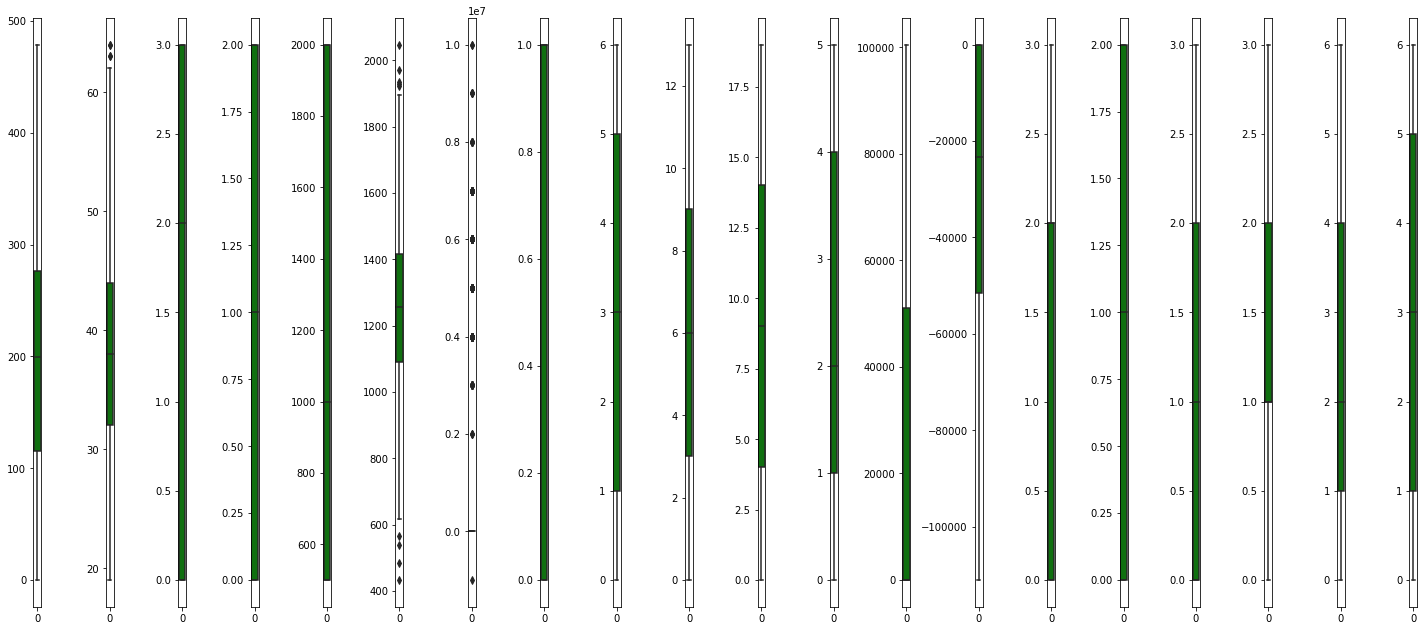

In [36]:
collist = df.columns.values
ncol = 40
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0, len(collist[0:20])):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(data = df[collist[i]], color='green', orient='v')
    plt.tight_layout()

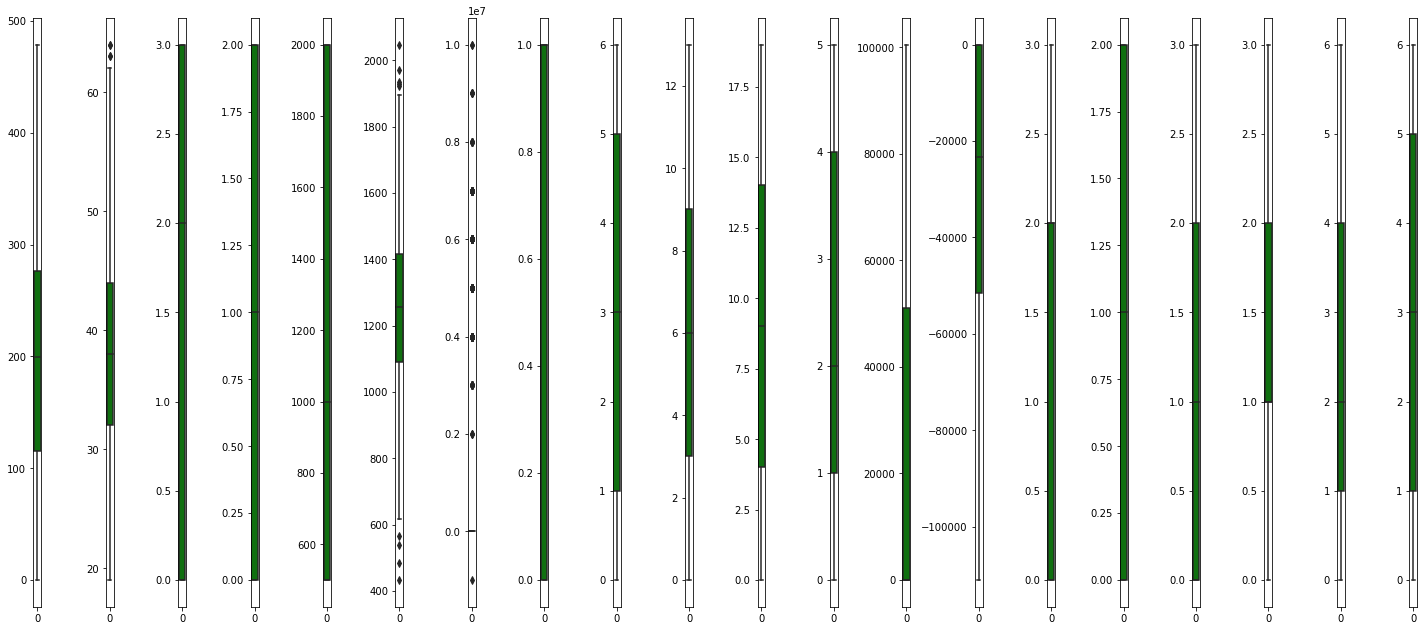

In [37]:
collist = df.columns.values
ncol = 40
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0, len(collist[20:40])):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(data = df[collist[i]], color='green', orient='v')
    plt.tight_layout()

In [38]:
df1=df

In [39]:
X = df1.drop(columns=["fraud_reported"])
y = df1["fraud_reported"]

# Show distribution of 0 and 1
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [40]:
y.shape

(1000,)

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
print(X.shape)
print(y.shape)

(1506, 39)
(1506,)


In [42]:
y.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 1.07064513,  1.00538277,  1.17481863, ...,  1.26392555,
        -0.79482897,  0.        ],
       [ 0.17655591,  0.32878795, -1.39555937, ...,  0.77914982,
        -0.79482897,  0.        ],
       [-0.66388796, -1.13716751,  1.17481863, ...,  0.90034375,
         1.17394147,  0.        ],
       ...,
       [ 1.24052208,  1.56921179,  1.17481863, ..., -0.9175652 ,
        -0.79482897,  0.        ],
       [-1.49539094, -1.13716751,  0.31802596, ..., -0.79637127,
        -0.79482897,  0.        ],
       [ 1.69650758,  1.7947434 , -1.39555937, ..., -0.06920769,
        -0.79482897,  0.        ]])

# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1100)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1054, 39), (1054,), (452, 39), (452,))

# Model  Buildimg

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

## Logistic Regression

Train Score: 0.7988614800759013
Test Score: 0.7986725663716814


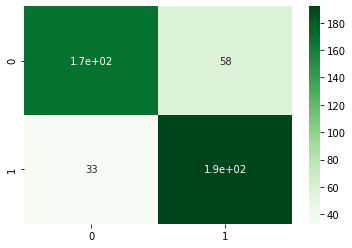

Classification Report for Logistic Regression
-------------------------------------------------
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       227
           1       0.77      0.85      0.81       225

    accuracy                           0.80       452
   macro avg       0.80      0.80      0.80       452
weighted avg       0.80      0.80      0.80       452



In [47]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
test_pred = lr.predict(X_test)
f_score = lr.score(X_test, y_test)
train_score=lr.score(X_train, y_train)
class_report=classification_report(y_test, test_pred)

#print("text_pred", test_pred)
print("Train Score:", train_score)
print("Test Score:", f_score)
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap="Greens")
plt.show()

print("Classification Report for Logistic Regression\n-------------------------------------------------\n",class_report)

## KNeighborsClassifier

Train Score: 0.7352941176470589
Test Score: 0.6548672566371682


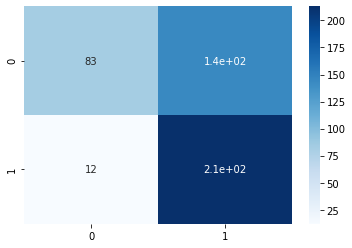

Classification Report for KNeighborsClassifier
-------------------------------------------------
               precision    recall  f1-score   support

           0       0.87      0.37      0.52       227
           1       0.60      0.95      0.73       225

    accuracy                           0.65       452
   macro avg       0.74      0.66      0.62       452
weighted avg       0.74      0.65      0.62       452



In [48]:
kn=KNeighborsClassifier()
kn.fit(X_train, y_train)
test_pred = kn.predict(X_test)
f_score = kn.score(X_test, y_test)
train_score=kn.score(X_train, y_train)
class_report=classification_report(y_test, test_pred)

#print("text_pred", test_pred)
print("Train Score:", train_score)
print("Test Score:", f_score)
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap="Blues")
plt.show()

print("Classification Report for KNeighborsClassifier\n-------------------------------------------------\n",class_report)

## DecisionTreeClassifier

Train Score: 1.0
Test Score: 0.7743362831858407


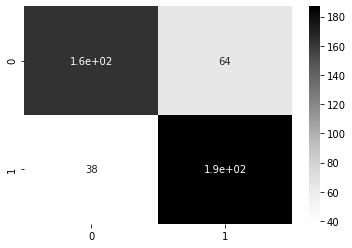

Classification Report for DecisionTreeClassifier
-------------------------------------------------
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       227
           1       0.75      0.83      0.79       225

    accuracy                           0.77       452
   macro avg       0.78      0.77      0.77       452
weighted avg       0.78      0.77      0.77       452



In [49]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
f_score = dt.score(X_test, y_test)
train_score=dt.score(X_train, y_train)
class_report=classification_report(y_test, test_pred)

#print("text_pred", test_pred)
print("Train Score:", train_score)
print("Test Score:", f_score)
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap='Greys')
plt.show()

print("Classification Report for DecisionTreeClassifier\n-------------------------------------------------\n",class_report)

## RandomForestClassifier

Train Score: 1.0
Test Score: 0.8805309734513275


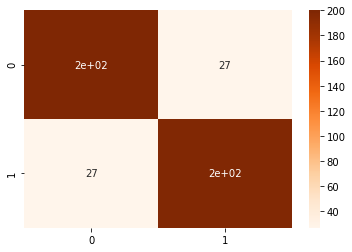

Classification Report for RandomForestClassifier
-------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       227
           1       0.88      0.88      0.88       225

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



In [50]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
test_pred = rf.predict(X_test)
f_score = rf.score(X_test, y_test)
train_score=rf.score(X_train, y_train)
class_report=classification_report(y_test, test_pred)

#print("text_pred", test_pred)
print("Train Score:", train_score)
print("Test Score:", f_score)
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap="Oranges")
plt.show()

print("Classification Report for RandomForestClassifier\n-------------------------------------------------\n",class_report)

## NaiveBayesClassifier 

Train Score: 0.7836812144212524
Test Score: 0.7765486725663717


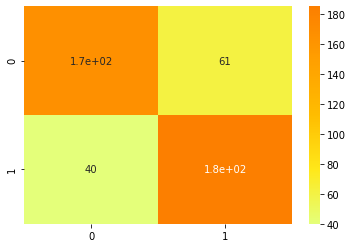

Classification Report for GaussianNB
-------------------------------------------------
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       227
           1       0.75      0.82      0.79       225

    accuracy                           0.78       452
   macro avg       0.78      0.78      0.78       452
weighted avg       0.78      0.78      0.78       452



In [51]:
nb=GaussianNB()
nb.fit(X_train, y_train)
test_pred = nb.predict(X_test)
f_score = nb.score(X_test, y_test)
train_score=nb.score(X_train, y_train)
class_report=classification_report(y_test, test_pred)

#print("text_pred", test_pred)
print("Train Score:", train_score)
print("Test Score:", f_score)
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap="Wistia")
plt.show()

print("Classification Report for GaussianNB\n-------------------------------------------------\n",class_report)

In [52]:
df2=pd.DataFrame({'Models':["Logistic Regression","KNeighborsClassifier","DecisionTreeClassifier","RandomForestClassifier","NaiveBayesClassifier"],
                 'Accuracy Score':[0.80,0.65,0.80,0.87,0.78]})

df2.sort_values(by=['Accuracy Score'], ascending=False,inplace=True,kind='quicksort')
df2

,Models,Accuracy Score
3,RandomForestClassifier,0.87
0,Logistic Regression,0.80
2,DecisionTreeClassifier,0.80
4,NaiveBayesClassifier,0.78
1,KNeighborsClassifier,0.65


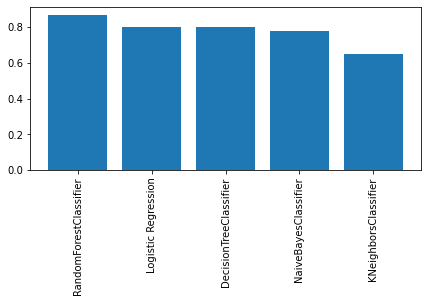

In [53]:
plt.figure(figsize=(7,3))
plt.bar(x=df2.Models, height=df2['Accuracy Score'])
plt.xticks(rotation=90)
plt.show()

# Performing Hyperparameter tuning for RandomForestClassifier, LogisticRegression and DecisionTreeClassifier

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Take top 3 models and define new -> for randomized search cv
RF = RandomForestClassifier()
LG = LogisticRegression()
DT = DecisionTreeClassifier()

RF.fit(X_train, y_train)
LG.fit(X_train, y_train)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
# Grid Search for RandomForestClassifier
grid_param_RF = {
    "n_estimators": randint(low=1, high=100),
    "max_depth": randint(low=10, high=100),
    "max_features": randint(low=1, high=4)
}

RF_grid_search = RandomizedSearchCV(estimator=RF, param_distributions=grid_param_RF, cv= 10, verbose=1, random_state=14)
RF_grid_search.fit(X_train, y_train)

RF_best_grid = RF_grid_search.best_estimator_
print(RF_best_grid)
print(RF_grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
RandomForestClassifier(max_depth=42, max_features=1, n_estimators=78)
0.8605211141060198


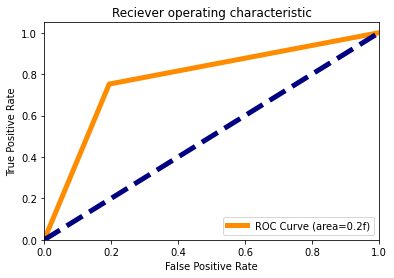

In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=5, label='ROC Curve (area=0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=5, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
insurance = dict()
insurance['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
insurance['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
insurance['C'] = loguniform(1e-5, 100)

search = RandomizedSearchCV(LG, insurance, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8327073974243787
Best Hyperparameters: {'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'}


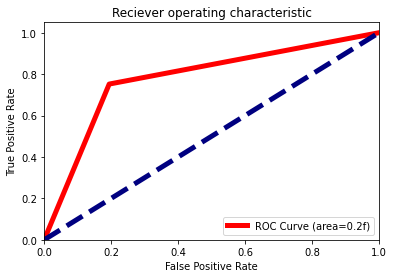

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color='red', lw=5, label='ROC Curve (area=0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=5, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

grid_param_DT = {
    'criterion':['gini','entropy'],
    'max_depth': [2, 3, 5, 10, 20, 30, 45, 57, 63, 78, 88, 91, 100],
    "min_samples_leaf": [5, 10, 20, 45, 50, 65, 70, 79, 85, 90, 97, 100]
}

DT_grid_search = GridSearchCV(estimator=DT, param_grid=grid_param_DT, cv= 10, verbose=1, n_jobs=-1)
DT_grid_search.fit(X_train, y_train)

DT_best_grid = DT_grid_search.best_estimator_
print(DT_best_grid)
print(DT_grid_search.best_score_)

Fitting 10 folds for each of 312 candidates, totalling 3120 fits
DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
0.8311230907457322


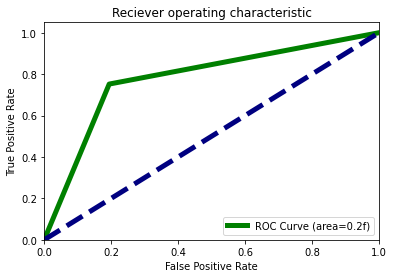

In [60]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color='green', lw=5, label='ROC Curve (area=0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=5, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [66]:
df3=pd.DataFrame({'Models':["RandomForestClassifier", "Logistic Regression","DecisionTreeClassifier"],
                 'Hyperparameter tuning Score':[0.8605211141060198, 0.8327073974243787, 0.8311230907457322]})
df3.index=df3.index+1
df3

,Models,Hyperparameter tuning Score
1,RandomForestClassifier,0.860521
2,Logistic Regression,0.832707
3,DecisionTreeClassifier,0.831123


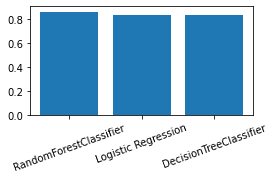

In [67]:
plt.figure(figsize=(4,2))
plt.bar(x=df3.Models, height=df3['Hyperparameter tuning Score'])
plt.xticks(rotation=20)
plt.show()

# Model Saving

In [68]:
import pickle
filename = 'insurance_claim_fraud_detection.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [72]:
a = np.array(y_test)
predicted=np.array(RF.predict(X_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted}, index=range(len(a)))
df_com.head(7)

,original,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
